In [56]:
train = pd.read_csv('train (2).csv')
test = pd.read_csv('test (1).csv')
train.head(2)
#test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [57]:
#This will be useful when splitting file later
print(len(train), len(test))

1460 1459


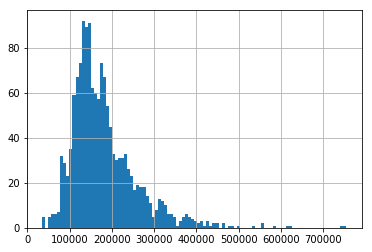

In [58]:
train['SalePrice'].hist(bins=100)
plt.show()

In [59]:
X_train = train.drop('SalePrice', axis = 1)
X_train.head(2)
y = train['SalePrice']

In [60]:
X = pd.concat([X_train, test], axis = 0)

In [61]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

In [62]:
#Separete the target variable
# y_train = train['SalePrice']
# X_train = train.drop('SalePrice', axis = 1)

In [63]:
#Separate into Categorical and Numerical variables
cat_X = X[['MSSubClass', 'MSZoning', 'Street', 'Alley', 
                 'LandContour', 'Utilities', 'LotConfig', 'LotShape',
                 'HouseStyle', 'LandSlope', 'Neighborhood', 'Condition1', 
                 'Condition2', 'BldgType', 'RoofStyle', 
                 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
                 'MasVnrType', 'ExterCond', 'Foundation',  
                 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                 'Heating', 'CentralAir', 'Electrical', 'KitchenQual',
                 'Functional', 'FireplaceQu', 'GarageType', 
                 'GarageFinish', 'GarageQual', 'GarageCond', 
                 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                 'SaleType','SaleCondition', 'ExterQual', 'BsmtQual',
                 'OverallQual', 'OverallCond', 'BsmtFinType2', 
                 'HeatingQC']]


In [64]:
num_X = X.drop(['MSSubClass', 'MSZoning', 'Street', 
                      'Alley', 'LandContour', 'LotShape', 'HouseStyle',
                      'Utilities', 'LotConfig', 'LandSlope', 
                      'Neighborhood', 'Condition1', 'Condition2', 
                      'BldgType', 'RoofStyle', 'RoofMatl', 
                      'Exterior1st', 'Exterior2nd', 'MasVnrType', 
                      'ExterCond', 'Foundation',  'BsmtCond', 
                      'BsmtExposure', 'BsmtFinType1', 'Heating', 
                      'CentralAir', 'Electrical', 'KitchenQual', 
                      'Functional', 'FireplaceQu', 'GarageType', 
                      'GarageFinish', 'GarageQual', 'GarageCond', 
                      'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                      'SaleType','SaleCondition', 'ExterQual', 
                      'BsmtQual', 'OverallQual', 'OverallCond', 
                      'BsmtFinType2', 'HeatingQC'], axis = 1)

### Numeric Variables

In [65]:
# Let's start with the numerical variables
num_X.head(2)

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,65.0,8450,2003,2003,196.0,706.0,0.0,150.0,856.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,2,80.0,9600,1976,1976,0.0,978.0,0.0,284.0,1262.0,...,460.0,298,0,0,0,0,0,0,5,2007


In [66]:
#drop Id: we can drop this becuase this apears to be the observation id
#instead, we can work with pandas index
num_X.drop('Id', axis=1, inplace=True)

In [67]:
num_X.isnull().sum()
#There are missing values for LotFrontage, MasVnrArea, GarageYrBuilt
#We are going to assume that missing values for LotFrontage, MasVnrArea 
#are due to these features not being present in the property. 
#For this reason, we are going to fill these with 0 using .fillna(0)

LotFrontage      486
LotArea            0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt      159
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [68]:
#num_X = num_X.fillna(0)

In [69]:
#I want to do one more thing with the numeric variables.
#For YearBuilt and GarageYrBlt, I'm going to change this to age of
#House/Garage
#The data is of houses in Iowa from 2006 to 2010, so I'm going to 
#set most current date/year to 2010+1. That is, houses builg in 2010
# will be 1 year old
current_yr = 2010
num_X['HouseAge'] = (current_yr-num_X['YearBuilt']+1).astype(int)
num_X['GarageAge'] = [(current_yr-i+1) if i > 0 else i+1 for i in num_X['GarageYrBlt']]
num_X['RemodYrsAgo'] = (current_yr-num_X['YearRemodAdd']+1).astype(int)

In [70]:
#Changing them to categories
num_X['HouseAge'] = pd.cut(num_X['HouseAge'], bins = 10)
num_X['GarageAge'] = pd.cut(num_X['GarageAge'], bins = 10)
num_X['RemodYrsAgo'] = pd.cut(num_X['RemodYrsAgo'], bins = 10)

In [71]:
#get dummies
subset = num_X[['HouseAge', 'GarageAge', 'RemodYrsAgo']]
subset_dumb = pd.get_dummies(subset)
num_X1 = pd.concat([num_X, subset_dumb], axis=1)
num_X1.head(2)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,"RemodYrsAgo_(0.94, 7.0]","RemodYrsAgo_(7.0, 13.0]","RemodYrsAgo_(13.0, 19.0]","RemodYrsAgo_(19.0, 25.0]","RemodYrsAgo_(25.0, 31.0]","RemodYrsAgo_(31.0, 37.0]","RemodYrsAgo_(37.0, 43.0]","RemodYrsAgo_(43.0, 49.0]","RemodYrsAgo_(49.0, 55.0]","RemodYrsAgo_(55.0, 61.0]"
0,65.0,8450,2003,2003,196.0,706.0,0.0,150.0,856.0,856,...,0,1,0,0,0,0,0,0,0,0
1,80.0,9600,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,...,0,0,0,0,0,1,0,0,0,0


In [72]:
#Now we can remove the columns YearBuilt and GarageYrBlt
to_drop = ['YearBuilt', 'GarageYrBlt', 'YearRemodAdd', 'HouseAge', 'GarageAge', 'RemodYrsAgo']
num_X1.drop(to_drop, axis=1, inplace=True)

In [73]:
#Let's have a look at our new numeric dataframe
#This dataframe also passed the isnull().sum() test
num_X.head(2)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,HouseAge,GarageAge,RemodYrsAgo
0,65.0,8450,2003,2003,196.0,706.0,0.0,150.0,856.0,856,...,0,0,0,0,0,2,2008,"(0.862, 14.8]","(-8.8, 22.4]","(7.0, 13.0]"
1,80.0,9600,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,...,0,0,0,0,0,5,2007,"(28.6, 42.4]","(22.4, 53.6]","(31.0, 37.0]"


In [74]:
#Fill missing value for LotFrontage; assume that Na means no LotFrontage
num_X1['LotFrontage'].fillna(0, inplace=True)

In [75]:
num_X1.fillna(0, inplace=True)

In [76]:
#num_X1.isnull().sum()

### Categorical Variables

In [77]:
#I think I'm satisfied with this for now. Let's turn our attention 
#to categorical variables.
cat_X.head(2)

,MSSubClass,MSZoning,Street,Alley,LandContour,Utilities,LotConfig,LotShape,HouseStyle,LandSlope,...,Fence,MiscFeature,SaleType,SaleCondition,ExterQual,BsmtQual,OverallQual,OverallCond,BsmtFinType2,HeatingQC
0,60,RL,Pave,NaN,Lvl,AllPub,Inside,Reg,2Story,Gtl,...,NaN,NaN,WD,Normal,Gd,Gd,7,5,Unf,Ex
1,20,RL,Pave,NaN,Lvl,AllPub,FR2,Reg,1Story,Gtl,...,NaN,NaN,WD,Normal,TA,Gd,6,8,Unf,Ex


In [78]:
cat_X.isnull().sum()

MSSubClass          0
MSZoning            4
Street              0
Alley            2721
LandContour         0
Utilities           2
LotConfig           0
LotShape            0
HouseStyle          0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
ExterCond           0
Foundation          0
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
Heating             0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
PoolQC           2909
Fence            2348
MiscFeature      2814
SaleType            1
SaleCondition       0
ExterQual           0
BsmtQual           81
OverallQual         0
OverallCond         0
BsmtFinType2       80
HeatingQC 

In [79]:
#Initial observations: 
#There are a number of variables in here that is ordinal. Let's fix that
ord_X = cat_X[['OverallQual', 'OverallCond', 'BsmtQual', 
       'BsmtCond', 'BsmtFinType2', 'HeatingQC', 
       'ExterQual', 'ExterCond', 'BsmtFinType1', 
       'KitchenQual', 'FireplaceQu', 'GarageQual',
       'GarageCond', 'PoolQC', 'Fence']]
ord_X.head()


,OverallQual,OverallCond,BsmtQual,BsmtCond,BsmtFinType2,HeatingQC,ExterQual,ExterCond,BsmtFinType1,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC,Fence
0,7,5,Gd,TA,Unf,Ex,Gd,TA,GLQ,Gd,NaN,TA,TA,NaN,NaN
1,6,8,Gd,TA,Unf,Ex,TA,TA,ALQ,TA,TA,TA,TA,NaN,NaN
2,7,5,Gd,TA,Unf,Ex,Gd,TA,GLQ,Gd,TA,TA,TA,NaN,NaN
3,7,5,TA,Gd,Unf,Gd,TA,TA,ALQ,Gd,Gd,TA,TA,NaN,NaN
4,8,5,Gd,TA,Unf,Ex,Gd,TA,GLQ,Gd,TA,TA,TA,NaN,NaN


In [80]:
# Okay, we see that there are many NaNs for PoolQC, Fence, MiscFeatures, etc.
# Again, we're going to assume that NaN means that these features do not exist
feats = ['BsmtQual', 'BsmtCond', 'BsmtFinType2', 'HeatingQC', 
         'ExterQual', 'ExterCond', 'BsmtFinType1', 
         'KitchenQual', 'FireplaceQu', 'GarageQual',
         'GarageCond', 'PoolQC', 'Fence']

sub_frame = ord_X[feats]
sub_frame.fillna('None', inplace=True)
# factorized_frame = sub_frame.apply(lambda x: pd.factorize(x)[0])  
# factorized_frame.head()

/Users/cherylto/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [81]:
Ord_dummies = pd.get_dummies(sub_frame)

In [82]:
Ord_X1=pd.concat([ord_X[['OverallQual', 'OverallCond']], Ord_dummies], axis = 1)
Ord_X1.head(2)

,OverallQual,OverallCond,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,...,GarageCond_TA,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None
0,7,5,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,6,8,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [83]:
# new_ord = np.hstack((ord_X[['OverallQual', 'OverallCond']], Ord_dummies))
# ord_X1 = pd.DataFrame(new_ord)
# ord_X1.columns = ['OverallQual', 'OverallCond', 'BsmtQual', 
#        'BsmtCond', 'BsmtFinType2', 'HeatingQC', 
#        'ExterQual', 'ExterCond', 'BsmtFinType1', 
#        'KitchenQual', 'FireplaceQu', 'GarageQual',
#        'GarageCond', 'PoolQC', 'Fence']
# ord_X1.head()

## Other categorical variables

In [84]:
#Now for the remaining categorical variables
cat_X.drop(['OverallQual', 'OverallCond', 'BsmtQual', 
       'BsmtCond', 'BsmtFinType2', 'HeatingQC', 
       'ExterQual', 'ExterCond', 'BsmtFinType1', 
       'KitchenQual', 'FireplaceQu', 'GarageQual',
       'GarageCond', 'PoolQC', 'Fence'], axis=1, inplace=True)
cat_X.head()

/Users/cherylto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,MSSubClass,MSZoning,Street,Alley,LandContour,Utilities,LotConfig,LotShape,HouseStyle,LandSlope,...,Heating,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NaN,Lvl,AllPub,Inside,Reg,2Story,Gtl,...,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,NaN,WD,Normal
1,20,RL,Pave,NaN,Lvl,AllPub,FR2,Reg,1Story,Gtl,...,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,NaN,WD,Normal
2,60,RL,Pave,NaN,Lvl,AllPub,Inside,IR1,2Story,Gtl,...,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,NaN,WD,Normal
3,70,RL,Pave,NaN,Lvl,AllPub,Corner,IR1,2Story,Gtl,...,GasA,Y,SBrkr,Typ,Detchd,Unf,Y,NaN,WD,Abnorml
4,60,RL,Pave,NaN,Lvl,AllPub,FR2,IR1,2Story,Gtl,...,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,NaN,WD,Normal


In [85]:
cat_X_dummed = pd.get_dummies(cat_X)
cat_X_dummed.head(2)

,MSSubClass,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,20,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [86]:
print(len(cat_X_dummed), len(Ord_X1), len(num_X1))

2919 2919 2919


In [87]:
num_X['3SsnPorch'] = [1 if i > 0 else 0 for i in num_X['3SsnPorch']]
num_X['BsmtFullBath'] = [1 if i > 0 else 0 for i in num_X['BsmtFullBath']]
num_X['BsmtHalfBath'] = [1 if i > 0 else 0 for i in num_X['BsmtHalfBath']]
num_X['EnclosedPorch'] = [1 if i > 0 else 0 for i in num_X['EnclosedPorch']]
num_X['KitchenAbvGr'] = [1 if i > 0 else 0 for i in num_X['KitchenAbvGr']]
num_X['PoolArea'] = [1 if i > 0 else 0 for i in num_X['PoolArea']]
num_X['ScreenPorch'] = [1 if i > 0 else 0 for i in num_X['ScreenPorch']]


##[(current_yr-i+1) if i > 0 else i+1 for i in num_X['GarageYrBlt']]

In [88]:
#cat_X_dummed.isna().sum()

In [89]:
#[i for i in cat_X_dummed.columns]

## Getting to know the Data

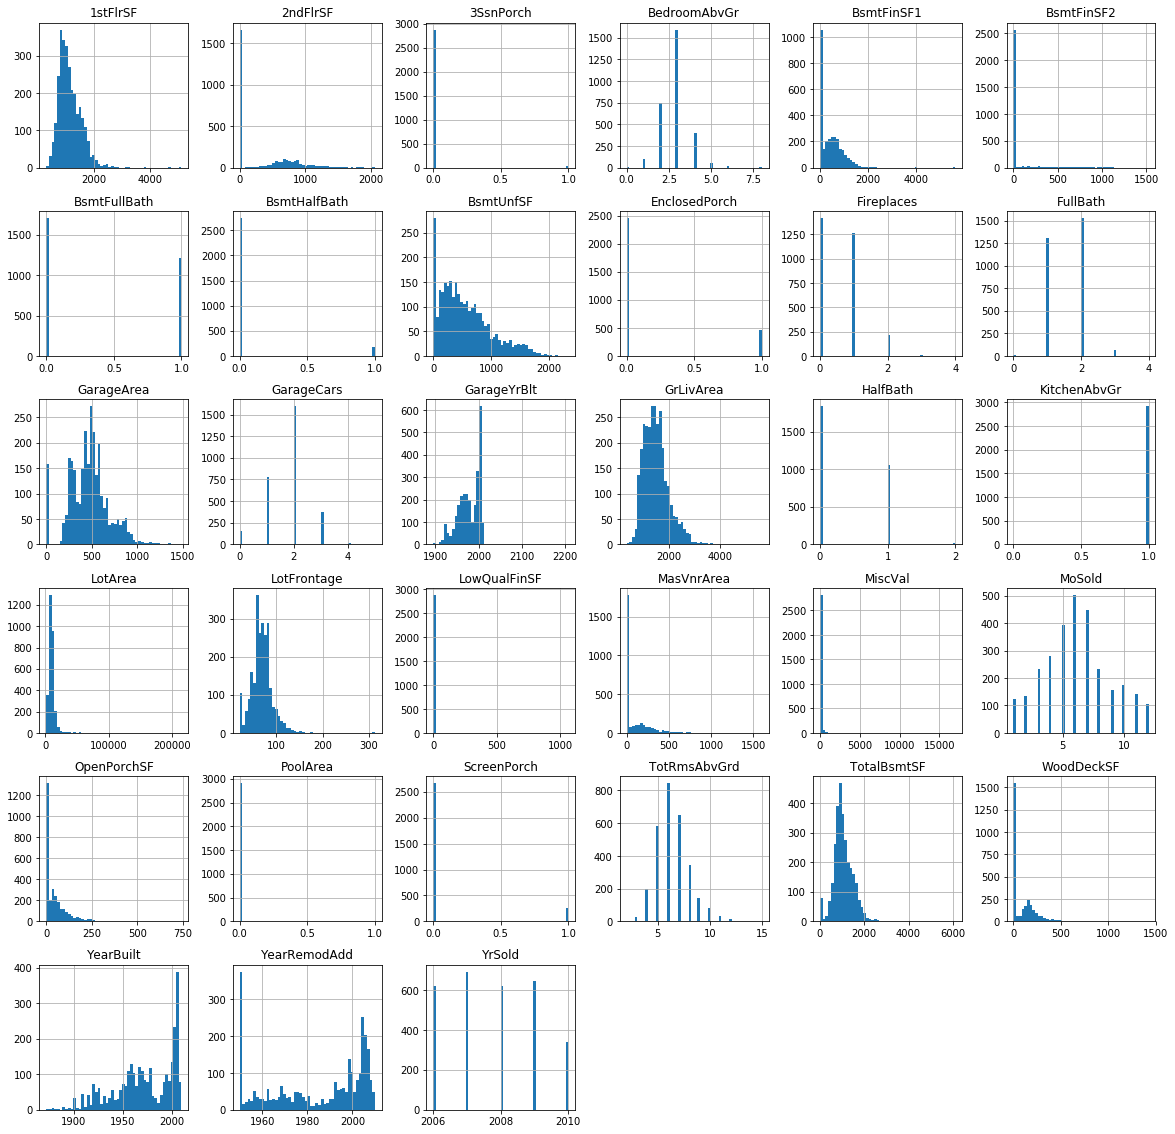

In [90]:
#Let's do a bit of visualisation to see what the data is doing
num_X.hist(figsize = (20, 20), bins = 50)
plt.show()

From this, we can actually gain a lot of insight as to what the data is doing. Some key insights are:
* the majority of the houses are fairly new, as such, we cannot assume equal classes
* most houses have 1 or 2 full baths, this is perhaps consistent with new builds
* most hosues don't have a pool, hence, pool area  = 0
* where houses have extra features, they are not usually worth very much
* most hosues took approx 3 - 8 months to sell

In [91]:
num_X['y'] = y

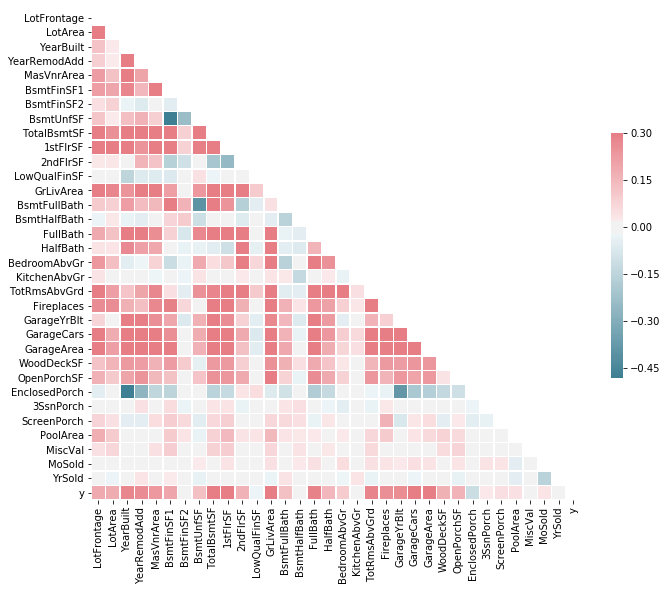

In [92]:

corr = num_X.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Here, we can see that there are a number of variables that don't matter very much. For instance, the bottom 7 features are very light, indicating a correlation of near zero. Looking at the correlation between the features and the y-variable, the features that appear more red are more highly correlated with the target variable.

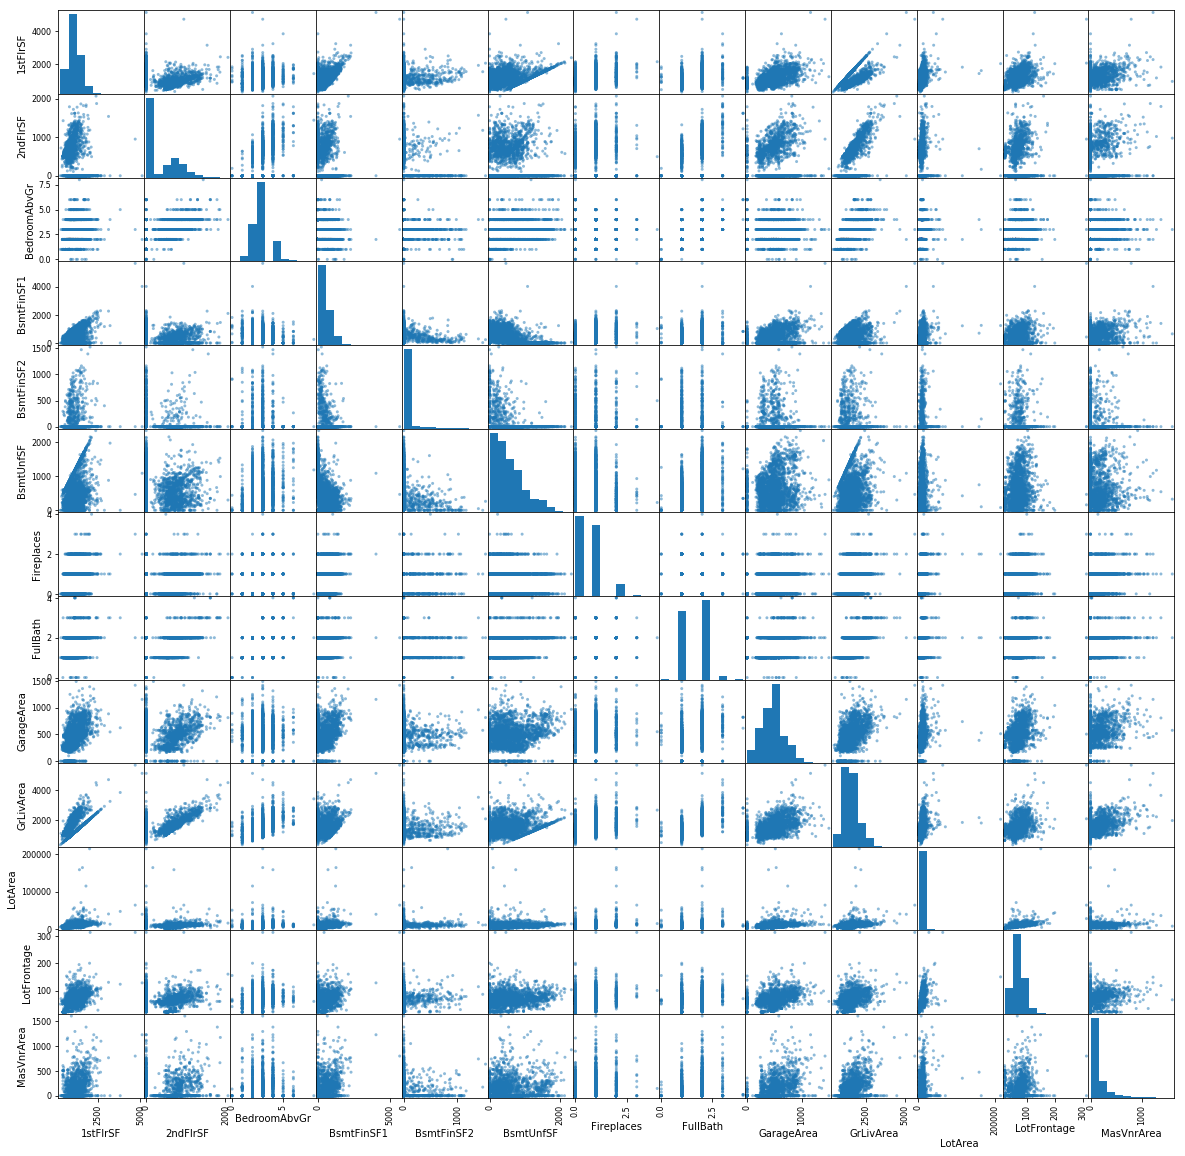

In [93]:
from pandas.plotting import scatter_matrix
reduced = num_X[['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Fireplaces', 'FullBath', 'GarageAge', 'GarageArea', 'GrLivArea', 'HouseAge', 'LotArea', 'LotFrontage', 'MasVnrArea', 'RemodYrsAgo']]
scatter_matrix(reduced, figsize=(20,20))
plt.show()

In [94]:
# # from sklearn.preprocessing import StandardScaler
prepped = pd.concat([num_X1, Ord_X1, cat_X_dummed], axis = 1)
prepped.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,706.0,0.0,150.0,856.0,856,854,0,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,0.0,978.0,0.0,284.0,1262.0,1262,0,0,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,162.0,486.0,0.0,434.0,920.0,920,866,0,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,0.0,216.0,0.0,540.0,756.0,961,756,0,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,...,0,0,0,1,0,0,0,0,1,0


In [95]:
df_prepped = prepped.iloc[:1460]
X_test = prepped.iloc[1460:]

In [96]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# df_prepped = scaler.fit_transform(df_prepped)

# X_test = scaler.fit_transform(X_test)

In [97]:
#[i for i in test_prepped if i not in df_prepped.columns]

In [98]:
df_prepped.shape

(1460, 325)

In [99]:
X_test.shape

(1459, 325)

## Linear Regression

In [102]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df_prepped, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [103]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [105]:
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(lin_reg, df_prepped, y,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [ 23765.13242746  35312.12798931  23942.05294348  42704.18092534
  29664.60442016  44282.009248    24222.68659113  23405.64331279
  67213.14282915 102638.52423907]
Mean:  41715.01049259113
Standard deviation:  24155.531201115835


In [106]:
from sklearn.model_selection import cross_val_predict
preds = cross_val_predict(lin_reg, df_prepped, y)
preds

array([209626.96773082, 217852.88494235, 202227.0306921 , ...,
       285399.01460928, 151057.09553403, 134738.85251092])

## Lasso Regression

In [107]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)

scores = cross_val_score(lasso, df_prepped, y, scoring = 'neg_mean_squared_error', cv= 10)
#print(cross_val_score(lasso, df_prepped, y_train))

/Users/cherylto/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/cherylto/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/cherylto/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/cherylto/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objectiv

In [108]:
lasso_rmse_scores = np.sqrt(-scores)

In [109]:
display_scores(lasso_rmse_scores)

Scores:  [21880.69058943 32936.55516748 24582.75782655 42212.43831129
 29735.70870339 43553.64367165 24153.23333006 23421.51882926
 67401.20104682 35405.69784938]
Mean:  34528.34453253218
Standard deviation:  13180.596619400147


In [110]:
preds = cross_val_predict(lasso, df_prepped, y)
preds
#this is worse that regression

/Users/cherylto/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/cherylto/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/cherylto/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


array([209600.45261632, 217800.28353598, 202222.10720766, ...,
       285022.63389382, 151052.558537  , 134769.64546041])

### Regression Tree

In [115]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(df_prepped, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [117]:
from sklearn.metrics import mean_squared_error
housing_predictions = tree_reg.predict(df_prepped)
tree_mse = mean_squared_error(y, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [118]:
scores = cross_val_score(tree_reg, df_prepped, y, scoring = 'neg_mean_squared_error', cv= 10)

In [114]:
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
display_scores(tree_rmse_scores)
#this is the best one so far

## Random Forest Regressor

In [119]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(df_prepped, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [120]:
housing_predictions = forest_reg.predict(df_prepped)
forest_mse = mean_squared_error(y, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

12844.554896860605

In [121]:
scores = cross_val_score(forest_reg, df_prepped, y, scoring = 'neg_mean_squared_error', cv= 10)

In [122]:
forest_rmse_scores = np.sqrt(-scores)

In [123]:
display_scores(tree_rmse_scores)
#this is the best one so far

Scores:  [21880.69058943 32936.55516748 24582.75782655 42212.43831129
 29735.70870339 43553.64367165 24153.23333006 23421.51882926
 67401.20104682 35405.69784938]
Mean:  34528.34453253218
Standard deviation:  13180.596619400147


## Grid Search

In [124]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30, 50, 70], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2,3,4]},
]

In [125]:
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring='neg_mean_squared_error')
grid_search.fit(df_prepped, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30, 50, 70], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [126]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 70}

In [127]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=70, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [130]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

48012.624079294816 {'max_features': 2, 'n_estimators': 3}
39596.49404972876 {'max_features': 2, 'n_estimators': 10}
38666.14610119401 {'max_features': 2, 'n_estimators': 30}
37475.69532779018 {'max_features': 2, 'n_estimators': 50}
37046.05340541605 {'max_features': 2, 'n_estimators': 70}
46454.85458971126 {'max_features': 4, 'n_estimators': 3}
37806.80116602473 {'max_features': 4, 'n_estimators': 10}
37199.44745587735 {'max_features': 4, 'n_estimators': 30}
36120.52196596606 {'max_features': 4, 'n_estimators': 50}
35047.02830147987 {'max_features': 4, 'n_estimators': 70}
42632.671127053174 {'max_features': 6, 'n_estimators': 3}
37059.03149034159 {'max_features': 6, 'n_estimators': 10}
34539.33767215535 {'max_features': 6, 'n_estimators': 30}
34350.708400607575 {'max_features': 6, 'n_estimators': 50}
34275.562388857885 {'max_features': 6, 'n_estimators': 70}
44505.142051860894 {'max_features': 8, 'n_estimators': 3}
35526.85904011082 {'max_features': 8, 'n_estimators': 10}
33961.6970394

In [131]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.32708042e-02, 2.75046078e-02, 2.06764714e-02, 2.25964351e-02,
       1.52138422e-03, 1.18862968e-02, 3.54471239e-02, 2.81396842e-02,
       2.66756858e-02, 8.88945998e-04, 4.43520363e-02, 3.79877443e-03,
       7.28352139e-04, 2.45894120e-02, 6.17438993e-03, 7.48303188e-03,
       6.03743173e-04, 2.28273071e-02, 1.38991632e-02, 2.79762476e-02,
       2.88235419e-02, 1.22526783e-02, 1.55241985e-02, 2.49445243e-03,
       5.15602621e-04, 2.49644394e-03, 2.04713034e-03, 4.63333465e-04,
       6.09524900e-03, 3.82239290e-03, 1.26995987e-02, 2.19926918e-03,
       7.23349289e-04, 1.04216000e-03, 8.95324226e-04, 1.09250950e-03,
       2.08821296e-03, 1.54032243e-04, 1.50992734e-04, 1.76095068e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.69767066e-02, 4.20589953e-03,
       2.48131722e-03, 2.41796683e-04, 5.45481982e-03, 1.87361875e-03,
       3.55239682e-03, 1.12872740e-03, 1.92540539e-04, 6.81329908e-04,
      

In [132]:
#Getting the Best features
ord_attr = [i for i in Ord_X1.columns]
cat_attr = [i for i in cat_X_dummed.columns]
num_attr = [i for i in num_X1.columns] 
attr_X = ord_attr+cat_attr+num_attr

sorted(zip(feature_importances, attr_X), reverse=True)[:15]

[(0.04435203628722573, 'BsmtCond_Po'),
 (0.03949785488386202, 'GarageCond_None'),
 (0.03544712391284072, 'BsmtQual_TA'),
 (0.028823541901425123, 'HeatingQC_Fa'),
 (0.028139684201534825, 'BsmtCond_Fa'),
 (0.02797624763887294, 'HeatingQC_Ex'),
 (0.027504607832827262, 'OverallCond'),
 (0.02667568583574967, 'BsmtCond_Gd'),
 (0.024922809142046375, 'GarageCond_TA'),
 (0.024589412008161837, 'BsmtFinType2_BLQ'),
 (0.022827307063564454, 'BsmtFinType2_Rec'),
 (0.022596435124693445, 'BsmtQual_Fa'),
 (0.020676471423091824, 'BsmtQual_Ex'),
 (0.019664741031662183, 'LandContour_Low'),
 (0.019257235708877364, 'HouseStyle_SLvl')]

In [133]:
print(grid_search.best_score_)

-1080893760.7310019


## Grid Search Linear Regression

In [135]:
from sklearn.linear_model import Ridge
#GridSearch LinearRegression
alphas = np.array([1, 0.1, 0.01, 0.001, 0.0001])
fit_interceptOptions = ([True])
solverOptions=(['svd', 'cholesky', 'sparse_cg', 'sag'])
model = Ridge(normalize=True)
grid = GridSearchCV(estimator=model, 
                    param_grid=dict(alpha=alphas, 
                                    fit_intercept=fit_interceptOptions, 
                                    solver=solverOptions))



In [137]:
grid.fit(df_prepped, y)
print(grid)

GridSearchCV(cv=None, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04]), 'fit_intercept': [True], 'solver': ['svd', 'cholesky', 'sparse_cg', 'sag']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


/Users/cherylto/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:715: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [138]:
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_estimator_.fit_intercept)
print(grid.best_estimator_.solver)

0.8372359175641029
1.0
True
sag


## Test set

In [139]:
#Evaluation
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)
final_predictions

array([130455.        , 162160.71428571, 190433.57142857, ...,
       161985.51428571, 118174.41428571, 227223.94285714])

In [140]:
#Evaluation
final_model = grid.best_estimator_
final_predictions = final_model.predict(X_test)
final_predictions

array([113057.26686632, 160760.80380706, 188223.0346596 , ...,
       170824.25343262, 120388.82680095, 227640.27112462])